In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [3]:
iris['data'][:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [4]:
X = iris['data']
y = iris['target']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10))

In [13]:
mlp.fit(X_train,y_train)

C:\Users\ce401Prof\bigdata\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [14]:
pred = mlp.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,pred))

[[12  0  0]
 [ 0 12  0]
 [ 0  2 12]]


In [17]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       0.86      1.00      0.92        12
          2       1.00      0.86      0.92        14

avg / total       0.95      0.95      0.95        38



In [25]:
import graphviz
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

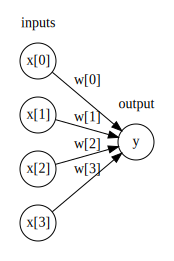

In [26]:
import mglearn
display(mglearn.plots.plot_logistic_regression_graph())

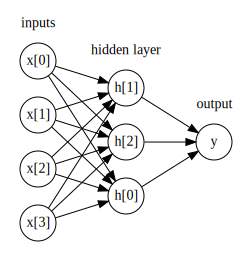

In [27]:
display(mglearn.plots.plot_single_hidden_layer_graph())

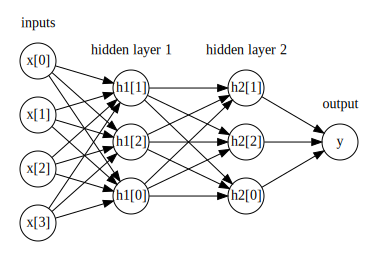

In [28]:
display(mglearn.plots.plot_two_hidden_layer_graph())

In [29]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

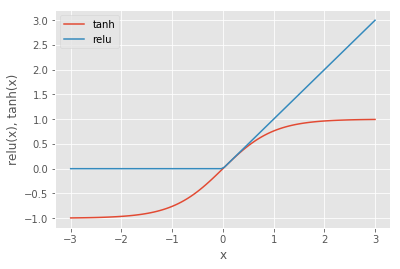

In [30]:
line = np.linspace(-3,3,100)
plt.plot(line, np.tanh(line), label = 'tanh')
plt.plot(line, np.maximum(line, 0), label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')
plt.show()

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

Text(0,0.5,'feature 1')

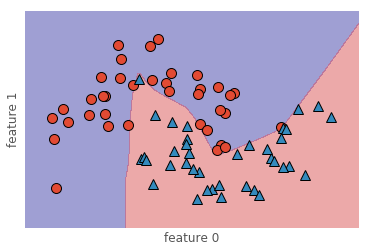

In [33]:
X,y = make_moons(n_samples=100, noise=.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)
mlp=MLPClassifier(solver='lbfgs', random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0,0.5,'feature 1')

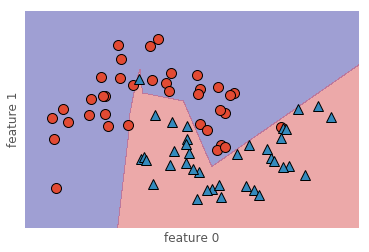

In [51]:
mlp=MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0,0.5,'feature 1')

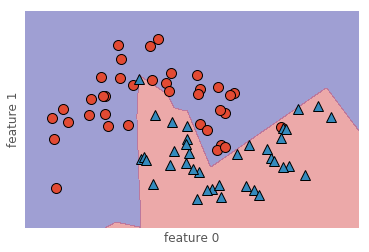

In [52]:
mlp=MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10,10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0,0.5,'feature 1')

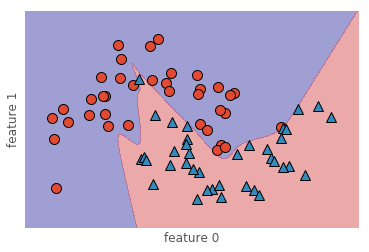

In [53]:
mlp=MLPClassifier(solver='lbfgs', activation='tanh',random_state=0, hidden_layer_sizes=[10,10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

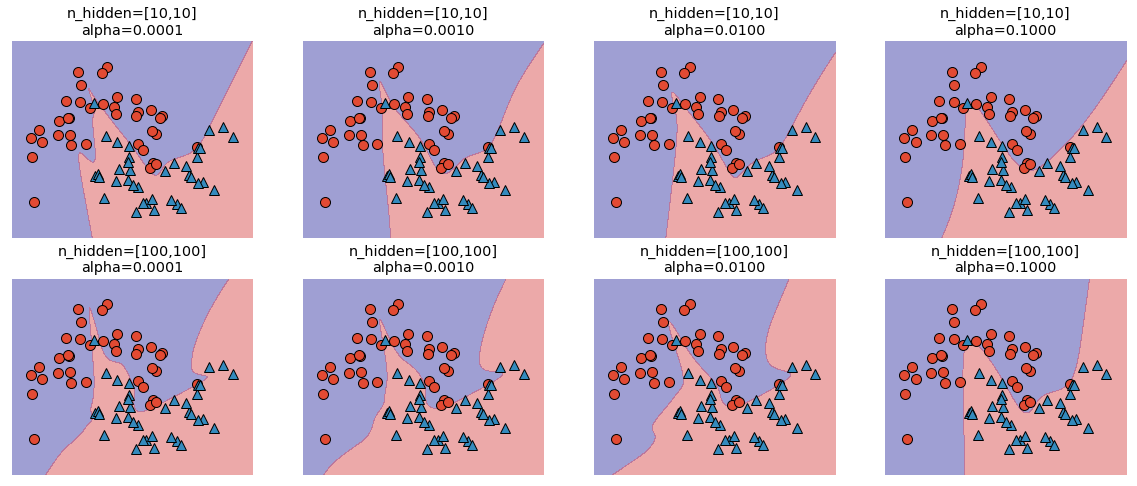

In [61]:
fig, axes = plt.subplots(2,4,figsize=(20,8))
for axx, n_hidden_nodes in zip(axes, [10,100]):
    for ax, alpha in zip(axx, [0.0001,0.001,0.01,0.1]):
        mlp=MLPClassifier(solver='lbfgs', activation='tanh',random_state=0, hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
        ax.set_title('n_hidden=[{},{}]\nalpha={:.4f}'.format(n_hidden_nodes,n_hidden_nodes,alpha))